<a href="https://colab.research.google.com/github/yuhanhu/git-example/blob/master/ShadowSense_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


 **Upload Files under Files/**

# **Unzip files**

In [ ]:
# from zipfile import ZipFile
# filename = "data.zip"

# with ZipFile(filename,'r') as zip:
#   zip.extractall()
  
#   print('Done')

Done


In [ ]:
from zipfile import ZipFile
filename = "gdrive/My Drive/data_combined.zip"

with ZipFile(filename,'r') as zip:
  zip.extractall()
  
  print('Done')

Done


In [ ]:
# from zipfile import ZipFile
# filename = "data/night.zip"
# #filename = "5_classes.zip"

# with ZipFile(filename,'r') as zip:
#   zip.extractall()
  
#   print('Done')

Done


In [ ]:
# from zipfile import ZipFile
# filename = "data/daylight.zip"
# #filename = "5_classes.zip"

# with ZipFile(filename,'r') as zip:
#   zip.extractall()
#   print('Done')

Done


In [ ]:
# from zipfile import ZipFile
# filename = "data/dusk.zip"
# #filename = "5_classes.zip"

# with ZipFile(filename,'r') as zip:
#   zip.extractall()
#   print('Done')

Done


# **Import data and Preprocess them**

In [ ]:
# !rm -r *
# !gdown --id 1wE-YVVccXDPkzTx65RuwXA3IDGi5pmhi
# !unzip codes.zip
# !rm -r __MACOSX


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models,utils
from torch.utils.data import DataLoader
from PIL import Image
import os

In [ ]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')


CUDA is available!  Training on GPU ...


## **Clean temperary files**

In [ ]:
import os, shutil
shutil.rmtree('data_group')
# shutil.rmtree('testset')

# **Split Train/Test Files**

In [ ]:
import os, shutil
#os.chdir('./')
#os.rmdir('data_group')
#shutil.rmtree('data_group')
os.mkdir('data_group')
os.mkdir('data_group/train')
os.mkdir('data_group/test1')
os.mkdir('data_group/test2')
os.mkdir('data_group/validation')

In [ ]:
#os.mkdir('data_group/test2')

In [ ]:

# from shutil import copyfile
# from google.colab.patches import cv2_imshow
#i=1
#copyfile('data_combined/train/2hands/daylight_100_1.jpg', 'data_group/train/'+str(i)+'.jpg')


# **Split Test by Lighting Condition**

In [ ]:
# import os, shutil
# from shutil import copyfile

# os.mkdir('testset')
# os.mkdir('testset/daylight')
# os.mkdir('testset/dusk')
# os.mkdir('testset/night')

# for f in os.listdir('data_combined/test/'):
#   if f.endswith('.DS_Store'):
#     continue
#   os.mkdir('testset/daylight/'+f)
#   os.mkdir('testset/dusk/'+f)
#   os.mkdir('testset/night/'+f)
#   i1 = 0
#   i2 = 0
#   i3 = 0
#   for ff in os.listdir('data_combined/test/'+f):
#     if ff.startswith('daylight'):
#       copyfile('data_combined/test/'+ f +'/'+ff, 'testset/daylight/'+ f +'/_day_'+ str(i1)+'.jpg')
#       i1 = i1+1
#     if ff.startswith('dusk'):
#       copyfile('data_combined/test/'+ f +'/'+ff, 'testset/dusk/'+ f +'/_dusk_'+ str(i2)+'.jpg')
#       i2 = i2+1
#     if ff.startswith('night'):
#       copyfile('data_combined/test/'+ f +'/'+ff, 'testset/night/'+ f +'/_night_'+ str(i3)+'.jpg')
#       i3 = i3+1

# print('Done')

Done


# **Hold out Lighting**

In [ ]:
from shutil import copyfile

for f in os.listdir('data_combined/train/'):
  if f.endswith('.DS_Store'):
    continue
  os.mkdir('data_group/train/'+f)
  os.mkdir('data_group/test1/'+f)
  os.mkdir('data_group/test2/'+f)
  i1 = 0
  i2 = 0
  i3 = 0
  for ff in os.listdir('data_combined/train/'+f):
    if ff.startswith('night'):
      copyfile('data_combined/train/'+ f +'/'+ff, 'data_group/train/'+ f +'/_day_'+ str(i1)+'.jpg')
      i1 = i1+1
      #print(ff)
    if ff.startswith('daylight'):
      copyfile('data_combined/train/'+ f +'/'+ff, 'data_group/test1/'+ f +'/_dusk_'+ str(i2)+'.jpg')
      i2 = i2+1
    if ff.startswith('dusk'):
    #if ff.endswith('_3.jpg') and ff.startswith('daylight'):
      copyfile('data_combined/train/'+ f +'/'+ff, 'data_group/test2/'+ f +'/_night_'+ str(i3)+'.jpg')
      i3 = i3+1
      #print(ff)
print('Done')

Done


In [ ]:
for f in os.listdir('data_combined/test/'):
  if f.endswith('.DS_Store'):
    continue
  os.mkdir('data_group/validation/'+f)
  for ff in os.listdir('data_combined/test/'+f):
    if ff.startswith('night'):
      copyfile('data_combined/test/'+ f +'/'+ff, 'data_group/validation/'+ f +'/_day_'+ str(i1)+'.jpg')
      i1 = i1+1
    if ff.startswith('daylight'):
      copyfile('data_combined/test/'+ f +'/'+ff, 'data_group/test1/'+ f +'/_dusk_'+ str(i2)+'.jpg')
      i2 = i2+1
    if ff.startswith('dusk'):
      copyfile('data_combined/test/'+ f +'/'+ff, 'data_group/test2/'+ f +'/_night_'+ str(i3)+'.jpg')
      i3 = i3+1
print('Done')

Done


In [ ]:
#count file numbers
import os
count = 0
d = "data_group/test2/hugging"
#d = "data_combined/test/punch"
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        count += 1
print(count)

340


# **Hold Out User**

In [ ]:
from shutil import copyfile

for f in os.listdir('data_combined/train/'):
  if f.endswith('.DS_Store'):
    continue
  os.mkdir('data_group/train/'+f)
  os.mkdir('data_group/test/'+f)
  i1 = 0
  i2 = 0
  i3 = 0
  i4 = 0
  for ff in os.listdir('data_combined/train/'+f):
    if ff.endswith('_4.jpg'):
      copyfile('data_combined/train/'+ f +'/'+ff, 'data_group/train/'+ f +'/_1_'+ str(i1)+'.jpg')
      i1 = i1+1
      #print(ff)
    if ff.endswith('_2.jpg'):
      copyfile('data_combined/train/'+ f +'/'+ff, 'data_group/train/'+ f +'/_2_'+ str(i2)+'.jpg')
      i2 = i2+1
      #print(ff)
    if ff.endswith('_3.jpg'):
      copyfile('data_combined/train/'+ f +'/'+ff, 'data_group/train/'+ f +'/_3_'+ str(i3)+'.jpg')
      i3 = i3+1
      #print(ff)
    if ff.endswith('_1.jpg'):
    #if ff.endswith('_3.jpg') and ff.startswith('daylight'):
      copyfile('data_combined/train/'+ f +'/'+ff, 'data_group/test/'+ f +'/_4_'+ str(i4)+'.jpg')
      i4 = i4+1
      #print(ff)
print('Done')

In [ ]:
for f in os.listdir('data_combined/test/'):
  if f.endswith('.DS_Store'):
    continue
  os.mkdir('data_group/validation/'+f)
  for ff in os.listdir('data_combined/test/'+f):
    if ff.endswith('_4.jpg'):
      copyfile('data_combined/test/'+ f +'/'+ff, 'data_group/validation/'+ f +'/_1_'+ str(i1)+'.jpg')
      i1 = i1+1
      #print(ff)
    if ff.endswith('_2.jpg'):
      copyfile('data_combined/test/'+ f +'/'+ff, 'data_group/validation/'+ f +'/_2_'+ str(i2)+'.jpg')
      i2 = i2+1
      #print(ff)
    if ff.endswith('_3.jpg'):
      copyfile('data_combined/test/'+ f +'/'+ff, 'data_group/validation/'+ f +'/_3_'+ str(i3)+'.jpg')
      i3 = i3+1
      #print(ff)
    if ff.endswith('_1.jpg'):
      copyfile('data_combined/test/'+ f +'/'+ff, 'data_group/test/'+ f +'/_4_'+ str(i4)+'.jpg')
      i4 = i4+1
      #print(ff)
print('Done')

In [ ]:
#count file numbers
import os
count = 0
d = "data_group/test/nothing"
#d = "data_combined/test/punch"
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        count += 1
print(count)

# **Import Data**

In [ ]:
# data_dir = 'night/train/'
# validation_dir = 'night/test/'


# data_dir = 'data_combined/train/'
# validation_dir = 'data_combined/test/'

# test_dir = 'testset/night/'

data_dir = 'data_group/train/'
validation_dir = 'data_group/validation/'
test_dir = 'data_group/test1/'

mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]      

image_transforms = transforms.Compose([
        transforms.Resize(size=(318,235)), # Image net standards
        transforms.Lambda(lambda img: transforms.functional.crop(img, 10,40,220,150)),
        transforms.Lambda(lambda img: transforms.functional.adjust_contrast(img, 3)),
        transforms.ToTensor(),
        transforms.Normalize(mean,
                             std)  # Imagenet standards
    ])

image_datasets  =  datasets.ImageFolder(root=data_dir, transform=image_transforms)

validation_datasets  =  datasets.ImageFolder(root=validation_dir, transform=image_transforms)

test_datasets  =  datasets.ImageFolder(root=test_dir, transform=image_transforms)

#train set
#validation_split = .3
shuffle_dataset = True
random_seed= 42

dataset_size = len(image_datasets)
indices = list(range(dataset_size))

val_size = len(validation_datasets)
indices_val = list(range(val_size))

test_size = len(test_datasets)
indices_test = list(range(test_size))

#split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
    np.random.shuffle(indices_val)
    np.random.shuffle(indices_test)
train_indices, val_indices, test_indices = indices, indices_val, indices_test


from torch.utils.data.sampler import SubsetRandomSampler

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

# Dataloader iterators, make sure to shuffle
dataloader_train = DataLoader(image_datasets, batch_size=16, sampler=train_sampler)

dataloader_valid = DataLoader(validation_datasets, batch_size=16, sampler=valid_sampler)

dataloader_test = DataLoader(test_datasets, batch_size=16, sampler=test_sampler)
print("Done")

Done


# **Show some samples of training data**

In [ ]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    if title != None:
      ax.set_title(title)
    
    return ax
  
 

In [ ]:
validation_datasets.classes
#len(image_datasets.classes)

['2hands', 'hugging', 'nothing', 'palm', 'point', 'punch']

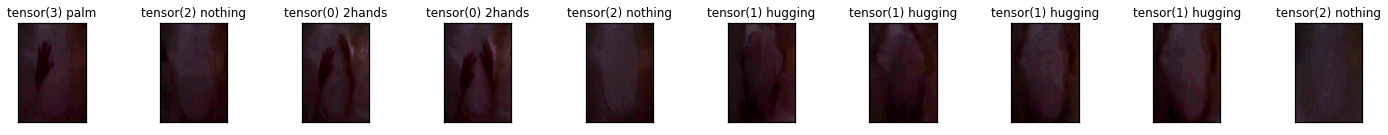

In [ ]:
# obtain one batch of training images
dataiter = iter(dataloader_train)
images, labels = dataiter.next()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(10):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx],ax)
    ax.set_title(str(labels[idx])+" "+image_datasets.classes[labels[idx]])

# **Download the pretrained model**

In [ ]:
model = models.densenet161(pretrained=True)
#print(model)

In [ ]:
for name in model.children():
  for child, config in name.named_children():
    print(str(child) + ' is frozen')
    for param in config.parameters():
          param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(2208, 512)),
                                        ('relu1', nn.ReLU()),
                                        ('dropout1', nn.Dropout(0.3)),
                                         ('fc3', nn.Linear(512, 6)),
                                        ('output', nn.LogSoftmax(dim=1))]))



conv0 is frozen
norm0 is frozen
relu0 is frozen
pool0 is frozen
denseblock1 is frozen
transition1 is frozen
denseblock2 is frozen
transition2 is frozen
denseblock3 is frozen
transition3 is frozen
denseblock4 is frozen
norm5 is frozen


In [ ]:
model.classifier=classifier

In [ ]:
#print(model)

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters())

In [ ]:
if train_on_gpu:
    model=model.cuda()
    
checkpoint = "shadow_Adam_densenet161"

# **Training**

In [ ]:
# number of epochs to train the model
n_epochs = 10
valid_loss_list = []
train_loss_list = []
train_accuracy = []
valid_accuracy = []

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    train_acc = 0
    valid_acc = 0
    n=0
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in dataloader_train:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            #print(data.shape)
            #print(target.shape)
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        #print(target)
        loss = criterion(output, target)
        
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == target.view(*top_class.shape)
        train_acc += sum(equals.cpu().numpy())[0]
        n+=len(equals)
        
        
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()
        
    train_loss = train_loss/n
    train_accu = train_acc/n
    ######################    
    # validate the model #
    ######################
    model.eval()
    n=0
    for data, target in dataloader_valid:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == target.view(*top_class.shape)
        valid_acc += sum(equals.cpu().numpy())[0]
        
        n+=len(equals)
        
        #print(target)
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()
    
  
    # calculate average losses
    valid_loss = valid_loss/n
    valid_accu = valid_acc/n
    
    
    train_accuracy.append(train_accu)
    valid_accuracy.append(valid_accu)
    
    valid_loss_list.append(valid_loss)
    train_loss_list.append(train_loss)
    
    
    
    
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTrain acc: {:.3f} \tValid acc: {:.3f}'.format(
        epoch, train_loss, valid_loss, train_accu, valid_accu))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        model.class_to_idx = image_datasets.class_to_idx
        torch.save(model.state_dict(), checkpoint+"epoch"+str(epoch))
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.063103 	Validation Loss: 0.053977 	Train acc: 0.646 	Valid acc: 0.724
Validation loss decreased (inf --> 0.053977).  Saving model ...
Epoch: 2 	Training Loss: 0.028902 	Validation Loss: 0.031605 	Train acc: 0.842 	Valid acc: 0.822
Validation loss decreased (0.053977 --> 0.031605).  Saving model ...
Epoch: 3 	Training Loss: 0.019496 	Validation Loss: 0.024808 	Train acc: 0.896 	Valid acc: 0.861
Validation loss decreased (0.031605 --> 0.024808).  Saving model ...
Epoch: 4 	Training Loss: 0.017680 	Validation Loss: 0.029296 	Train acc: 0.907 	Valid acc: 0.824
Epoch: 5 	Training Loss: 0.018101 	Validation Loss: 0.026005 	Train acc: 0.909 	Valid acc: 0.866
Epoch: 6 	Training Loss: 0.015009 	Validation Loss: 0.027632 	Train acc: 0.927 	Valid acc: 0.856
Epoch: 7 	Training Loss: 0.013913 	Validation Loss: 0.037734 	Train acc: 0.927 	Valid acc: 0.835
Epoch: 8 	Training Loss: 0.010995 	Validation Loss: 0.037226 	Train acc: 0.934 	Valid acc: 0.819
Epoch: 9 	Training Los

# **Print results**

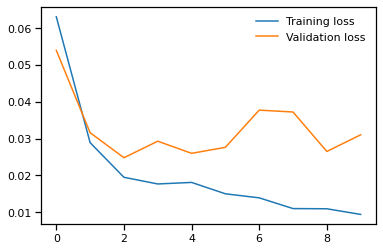

In [ ]:

plt.plot(train_loss_list, label='Training loss')
plt.plot(valid_loss_list, label='Validation loss')
plt.legend(frameon=False)

In [ ]:
model.load_state_dict(torch.load(checkpoint+"epoch3"))

<All keys matched successfully>

In [ ]:
def calculate_accuracy(loader):
  accuracy = 0
  with torch.no_grad():
    model.eval()
    for inputs, labels in loader:
        if train_on_gpu:
          inputs, labels = inputs.cuda(), labels.cuda()
        logps = model.forward(inputs)
        
        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        #print(top_class)
        equals = top_class == labels.view(*top_class.shape)
        #print(labels.view(*top_class.shape))
        #print(top_class)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
  return accuracy/len(loader)

In [ ]:
model = model.cuda()
calculate_accuracy(dataloader_test)

0.1923828125

# **Confusion Matrix**

In [ ]:
def preds(loader):
  flag = 0
  for inputs, labels in loader:
    if train_on_gpu:
      inputs, labels = inputs.cuda(), labels.cuda()
    logps = model.forward(inputs)
    ps = torch.exp(logps)
    top_p, top_class = ps.topk(1, dim=1)
    if flag:
      preds = torch.cat((preds,top_class),dim=0)
      l = torch.cat((l,labels),dim=0)
    else:
      preds = top_class
      l = labels
    #print(top_class.shape)
    #print(preds)
    flag = 1
  return preds, l 

In [ ]:
pred, label = preds(dataloader_test)
pred = torch.flatten(pred)
label = torch.flatten(label)
print('Done')

Done


In [ ]:
# stacked = torch.stack(
#     (
#         pred
#         ,label
#     )
#     ,dim=1
# )

In [ ]:
# stacked.shape
# print(stacked)

In [ ]:
# cmt = torch.zeros(5,5,dtype=torch.int32)
# cmt

In [ ]:
# for p in stacked:
#   tl, pl = p.tolist()
#   cmt[tl,pl] = cmt[tl,pl] + 1

In [ ]:
# cmt

# **Plotting a confusion matrix**

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
pred = pred.cpu()
label = label.cpu()
cm = confusion_matrix(pred,label)
print(cm)

[[151 169  22  17 220 208]
 [132 147 283 294 105  93]
 [ 57  11   0  18  14  39]
 [  0   0   0   0   0   0]
 [  0   9  35  10   1   0]
 [  0   4   0   1   0   0]]


In [ ]:
os.mkdir('results')

In [ ]:
# save results to files
# np.save('results/confusion_holdout_daylight.npy',cm)
# torch.save(pred, 'results/pred_holdout_daylight.pt')
# torch.save(label, 'results/label_holdout_daylight.pt')
torch.save(pred, 'results/pred_train_night_test_day.pt')
torch.save(label, 'results/label_train_night_test_day.pt')

In [ ]:
# np.save('results/confusion_night.npy',cm)
# torch.save(pred, 'results/s_pred_night.pt')
# torch.save(label, 'results/s_label_night.pt')

In [ ]:
#print accuracy
np.trace(cm)/np.sum(cm)

0.1465686274509804

In [ ]:
#test

# pred2= torch.load('results/pred_holdout_daylight.pt')
# label2 = torch.load('results/label_holdout_daylight.pt')
# pred3= torch.load('results/pred_holdout_3.pt')
# label3 = torch.load('results/label_holdout_3.pt')
# pred4 = torch.cat([pred2,pred3],0)
# label4 = torch.cat([label2,label3],0)
# cm2 = confusion_matrix(pred4,label4)
# label2

In [ ]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 90   2   0   8   1   1]
 [  0 101   1   0   0   0]
 [  0   0 102   0   0   0]
 [  1   2   0  97   1   1]
 [  0   0   0   0 100   2]
 [  7   0   0   0  18  77]]


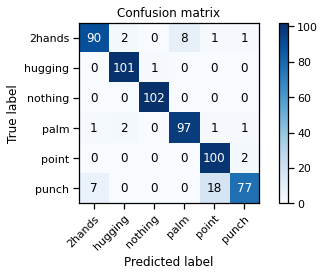

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(label, pred, classes=np.ravel(image_datasets.classes),
                      title='Confusion matrix')


Normalized confusion matrix
[[0.88235294 0.01960784 0.         0.07843137 0.00980392 0.00980392]
 [0.         0.99019608 0.00980392 0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.00980392 0.01960784 0.         0.95098039 0.00980392 0.00980392]
 [0.         0.         0.         0.         0.98039216 0.01960784]
 [0.06862745 0.         0.         0.         0.17647059 0.75490196]]


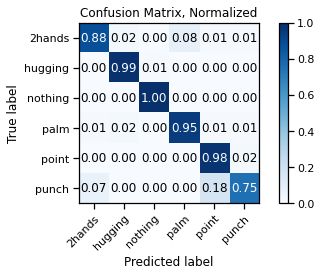

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(label, pred, classes=np.ravel(image_datasets.classes), normalize=True,
                      title='Confusion Matrix, Normalized')

In [ ]:
#calculate overall confusion matrix

pred1= torch.load('results/pred_holdout_1.pt')
label1 = torch.load('results/label_holdout_1.pt')
pred2= torch.load('results/pred_holdout_2.pt')
label2 = torch.load('results/label_holdout_2.pt')
pred3= torch.load('results/pred_holdout_3.pt')
label3 = torch.load('results/label_holdout_3.pt')
pred4= torch.load('results/pred_holdout_4.pt')
label4 = torch.load('results/label_holdout_4.pt')

pred0 = torch.cat([pred1,pred2,pred3,pred4],0)
label0 = torch.cat([label1,label2,label3,label4],0)

cm0 = confusion_matrix(pred0,label0)
cm1 = confusion_matrix(pred1,label1)
cm2 = confusion_matrix(pred2,label2)
cm3 = confusion_matrix(pred3,label3)
cm4 = confusion_matrix(pred4,label4)
print(cm0)
print(np.trace(cm0)/np.sum(cm0))

[[933   1   0  32   4  30]
 [  8 954  31  25   8  13]
 [  0  52 973   9  20  10]
 [ 56   7  11 889  39  29]
 [  6   2   3  38 805 164]
 [ 17   4   2  27 142 774]]
0.870872834259562


{'Actual': array([0, 1, 5, ..., 0, 4, 0]), 'Predicted': array([0, 1, 5, ..., 0, 4, 0])}
      Actual  Predicted
0          0          0
1          1          1
2          5          5
3          1          1
4          1          1
...      ...        ...
6113       2          2
6114       1          1
6115       0          0
6116       4          4
6117       0          0

[6118 rows x 2 columns]


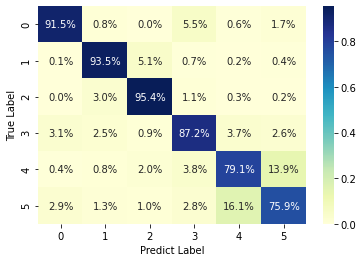

In [ ]:
# import torch
# import pandas as  pd
# import seaborn as sn
# import matplotlib.pyplot as plt

# label = label0.numpy()
# pred = pred0.numpy()

# data = {'Actual':    label,
#         'Predicted': pred
#         }
# print(data)
# df = pd.DataFrame(data, columns=['Actual','Predicted'])
# print(df)
# confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['True Label'], colnames=['Predict Label'], margins = False).apply(lambda r: r/r.sum(), axis=1)

# sn.heatmap(confusion_matrix, annot=True,fmt=".1%",cmap="YlGnBu")
# plt.show()

# **Print Pretty Confusion Matrix**

*   upload results files
*   run the code



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models,utils
from torch.utils.data import DataLoader
from PIL import Image
import os
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
#calculate overall confusion matrix

pred1= torch.load('results/pred_holdout_1.pt')
label1 = torch.load('results/label_holdout_1.pt')
pred2= torch.load('results/pred_holdout_2.pt')
label2 = torch.load('results/label_holdout_2.pt')
pred3= torch.load('results/pred_holdout_3.pt')
label3 = torch.load('results/label_holdout_3.pt')
pred4= torch.load('results/pred_holdout_4.pt')
label4 = torch.load('results/label_holdout_4.pt')


pred0 = torch.cat([pred1,pred2,pred3,pred4],0)
label0 = torch.cat([label1,label2,label3,label4],0)

cm0 = confusion_matrix(pred0,label0)
cm1 = confusion_matrix(pred1,label1)
cm2 = confusion_matrix(pred2,label2)
cm3 = confusion_matrix(pred3,label3)
cm4 = confusion_matrix(pred4,label4)
print(cm0)
print(np.trace(cm0)/np.sum(cm0))

FileNotFoundError: ignored

In [ ]:
pred11= torch.load('results/s_pred_night.pt')
label11 = torch.load('results/s_label_night.pt')
cm11=confusion_matrix(pred11,label11)

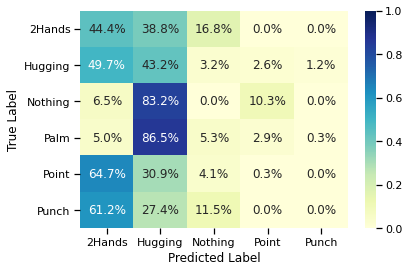

In [ ]:
import torch
import pandas as  pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sn.set_context('notebook')

label = label.numpy()
pred = pred.numpy()

data = {'Actual':    label,
        'Predicted': pred
        }
df = pd.DataFrame(data, columns=['Actual','Predicted'])
df=df.replace(0, '2Hands')
df=df.replace(1, 'Hugging')
df=df.replace(2, 'Nothing')
df=df.replace(3, 'Palm')
df=df.replace(4, 'Point')
df=df.replace(5, 'Punch')
confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['True Label'], colnames=['Predicted Label'], margins = False).apply(lambda r: r/r.sum(), axis=1)

ax = sn.heatmap(confusion_matrix, annot=True,fmt=".1%",cmap="YlGnBu",cbar_kws={'ticks': [0, 0.2,0.4,0.6,0.8,1]},vmax=1,vmin=0)
           
plt.show()


In [ ]:
pred_dusk= torch.load('results/pred_holdout_dusk.pt')
label_dusk = torch.load('results/label_holdout_dusk.pt')
pred_night= torch.load('results/pred_holdout_night.pt')
label_night = torch.load('results/label_holdout_night.pt')
pred_daylight= torch.load('results/pred_holdout_daylight.pt')
label_daylight = torch.load('results/label_holdout_daylight.pt')

pred_total = torch.cat([pred_daylight,pred_dusk,pred_night],0)
label_total = torch.cat([label_daylight,label_dusk,label_night],0)



cm_total = confusion_matrix(pred_total,label_total)
cm_dusk = confusion_matrix(pred_dusk,label_dusk)
cm_night = confusion_matrix(pred_night,label_night)
cm_daylight = confusion_matrix(pred_daylight,label_daylight)

print(cm_daylight)
print(np.trace(cm_total)/np.sum(cm_total))

In [ ]:
import torch
import pandas as  pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sn.set_context('notebook')

label = label_total.numpy()
pred = pred_total.numpy()

data = {'Actual':    label,
        'Predicted': pred
        }
df = pd.DataFrame(data, columns=['Actual','Predicted'])
df=df.replace(0, '2Hands')
df=df.replace(1, 'Hugging')
df=df.replace(2, 'Nothing')
df=df.replace(3, 'Palm')
df=df.replace(4, 'Point')
df=df.replace(5, 'Punch')
confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['True Label'], colnames=['Predicted Label'], margins = False).apply(lambda r: r/r.sum(), axis=1)
#confusion_matrix.insert(1, 'Hugging', 0)
ax = sn.heatmap(confusion_matrix, annot=True,fmt=".1%",cmap="YlGnBu",cbar_kws={'ticks': [0, 0.2,0.4,0.6,0.8,1]},vmax=1,vmin=0)
           
plt.show()

# **Print prediction results**

In [ ]:
def process_image(image, isPil=False):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    
    if not isPil:
      img = Image.open(image)
    else:
      img = image
    img_loader = transforms.Compose([
        transforms.Resize(size=(318,235)),
        transforms.Lambda(lambda img: transforms.functional.crop(img, 10,40,220,150)),
        transforms.Lambda(lambda img: transforms.functional.adjust_contrast(img, 3)),
        transforms.ToTensor(),
        transforms.Normalize(mean,
                             std)  # Imagenet standards
    ])
    img = img_loader(img)
    return img
  
 
#ima = process_image(Image.open('daylight/train/palm/105_1.jpg'),True)

In [ ]:
# ima.shape

torch.Size([3, 220, 150])

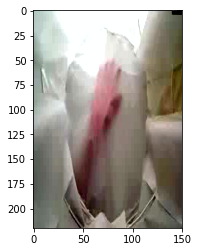

In [ ]:
# imshow(ima)

In [ ]:
model=model.cpu()

In [ ]:
def predict(ima, model, topk=6):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    image = ima.unsqueeze_(0)
    #print(image.shape)
    
    with torch.no_grad(): 
        output = model.forward(image)
        probabililty = torch.exp(output)
        
    
    prob,cla = probabililty.topk(topk)
    #print(cla)
    
    return prob.cpu().numpy().squeeze(), cla.cpu().numpy().squeeze()
    
    # TODO: Implement the code to predict the class from an image file
# import time
# t1=time.time()
# image = process_image('daylight/train/palm/105_1.jpg')
# #print(model)
# predict(image, model)
# t2=time.time()
# print('tiempo', str(t2-t1))

In [ ]:
image_path = 'daylight/train/palm/50_1.jpg'

In [ ]:
def view_classify(img, predicted_probability, predicted_class,clas):
    ''' Function for viewing an image and it's predicted classes.
    '''
    
    length = len(predicted_probability)
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    imshow(img,ax1,title=image_datasets.classes[clas])
    ax1.axis('off')
    ax2.barh(np.arange(length), predicted_probability)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(length))
    ax2.set_yticklabels([image_datasets.classes[i] for i in predicted_class], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [ ]:
image_datasets.classes

['2hands', 'hugging', 'nothing', 'palm', 'point', 'punch']

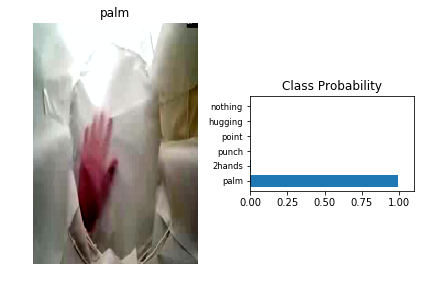

In [ ]:
img = process_image(image_path)
image=process_image(image_path)
predicted_probability, predicted_class = predict(img,model)

view_classify(image, predicted_probability, predicted_class, 3)

In [ ]:
# import cv2
# from matplotlib import pyplot as plt
# from skimage.io import imread
# from skimage.transform import resize
# from skimage import color, img_as_float
# from google.colab.patches import cv2_imshow
# import numpy as np
# vidcap = cv2.VideoCapture('video/night_test.mov')
# success,image = vidcap.read()
# count = 0
# images = []
# flat_data = []
# target = []
# frame=None
# print(success)
# frame_width = vidcap.get(3)
# frame_height = vidcap.get(4)
# print(frame_height)
# #out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'),10,(frame_width,frame_height))
# #out = cv2.VideoWriter('outpy.mov',apiPreference = cv::CAP_FFMPEG, fourcc = cv2.VideoWriter_fourcc('M','J','P','G'), fps= 10)
# fourcc = cv2.VideoWriter_fourcc(*"XVID")
# out = cv2.VideoWriter('output.mov', apiPreference=0, fourcc = fourcc, fps = 10, frameSize = (int(frame_width),int(frame_height)), isColor = True)
# i = 0
# while cv2.waitKey(20):
#     rv, frame = vidcap.read()
    
#     if rv:
#       if i%10 == 0:
#         image = frame
#         m=frame

#         img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         im_pil = Image.fromarray(img)


#         img = process_image(im_pil, isPil=True)

#         predicted_probability, predicted_class = predict(img, model)
#         m = np.argmax(predicted_probability)
#         #clase=max(list(zip(predicted_class,predicted_probability)), key=lambda x:x[1])
#         #k=image_datasets.classes[clase[0]]
#         k=image_datasets.classes[predicted_class[m]]
#         cv2.putText(frame, k, (50, 50), cv2.FONT_ITALIC, 0.8, 255)
#         out.write(frame)
#         cv2_imshow(image)
#       i = i+1
#     else:
#       break

      
# vidcap.release()
# out.release()

False
0.0


In [ ]:
# import cv2
# import numpy as np

# vidcap = cv2.VideoCapture('video/test_0701.mov')
# if (vidcap.isOpened() == False):
#   print("Unable to read video")
